In [1]:
import numpy as np
from pulser import Pulse, Sequence, Register
from pulser.devices import IroiseMVP, VirtualDevice, MockDevice, Device
from pulser.channels import Rydberg
from pulser.waveforms import CustomWaveform, InterpolatedWaveform
from pulser_simulation import Simulation
import qutip
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import sys
sys.path.append('../code/')
import benchmark_utils as bmu
import density_utils as du
import detuning_scale_utils as dsu
from pulser.channels.eom import RydbergBeam, RydbergEOM

In [76]:
import importlib
importlib.reload(bmu)
importlib.reload(du)
importlib.reload(dsu);

In [3]:
# import global variables

%store -r Fresnel
%store -r rc
%store -r spacing
%store -r brad
%store -r omega

In [4]:
d_list = [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5]

# import slices
path = "../MUP1/MUP1_logfilter8_slices/"
basename = "_density_slice_MUP1_logfilter8.p"
densities = []
for d in d_list:
    filename = path + f"d{d}" + basename
    with open(filename, 'rb') as file_in:
         densities.append(pickle.load(file_in))
            
# import slice coordinates
path = "../MUP1/MUP1_logfilter8_points/"
basename = "_plane_points_MUP1.p"
points = []
for d in d_list:
    filename = path + f"d{d}" + basename
    with open(filename, 'rb') as file_in:
         points.append(pickle.load(file_in))

# import registers
path = "registers/"
basename = "position_"
positions = []
registers = []
for i in range(len(d_list)):
    with open(f'registers/position_{i}.npy', 'rb') as file_in:
        pos = np.load(file_in)
    positions.append(pos)
    registers.append(Register.from_coordinates(pos))

basename = "rescaled_position_"
rescaled_positions = []
for i in range(len(d_list)):
    with open(f'registers/rescaled_position_{i}.npy', 'rb') as file_in:
        res_pos = np.load(file_in)
    rescaled_positions.append(res_pos)

# Quantum solution

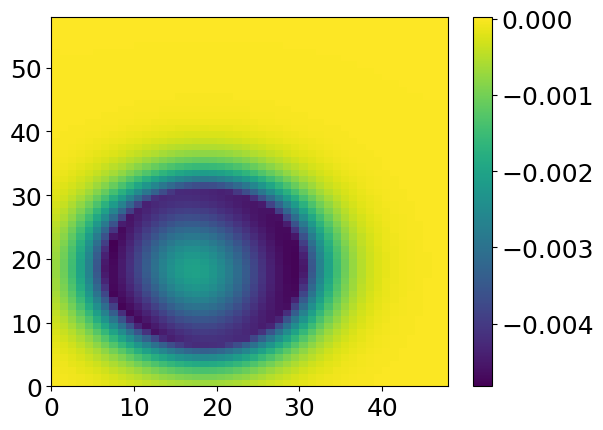

In [74]:
# Optimal variance and amplitude

variance = 50
amplitude = 6

G = amplitude*dsu.gaussian_mixture(densities[0].shape, variance, [(58,48.2)])
plt.pcolormesh((densities[0]-G)[30:,40:])
#plt.pcolormesh(G)
#plt.colorbar()
#plt.show()
#plt.pcolormesh(densities[0])
plt.colorbar()
plt.show()

Processing density 1 of 6
Density 1 has 4 qubits


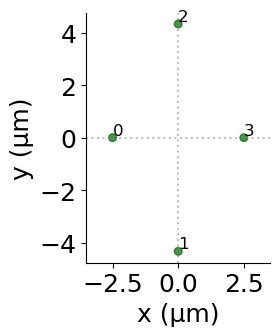

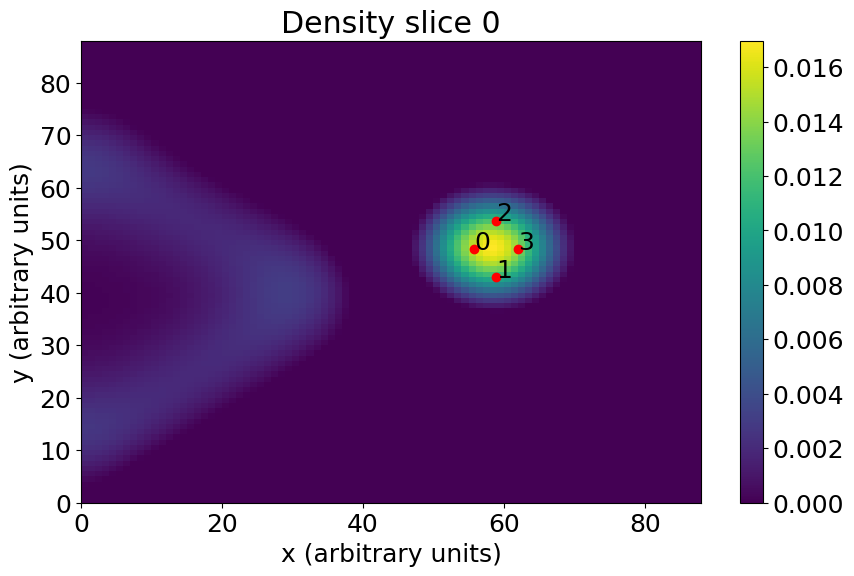

Processing density 2 of 6
Density 2 has 9 qubits


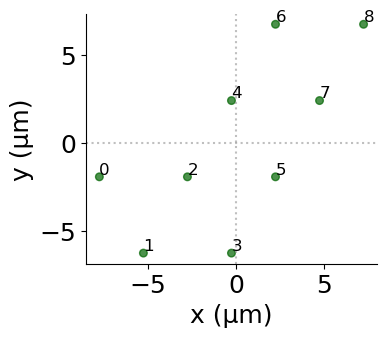

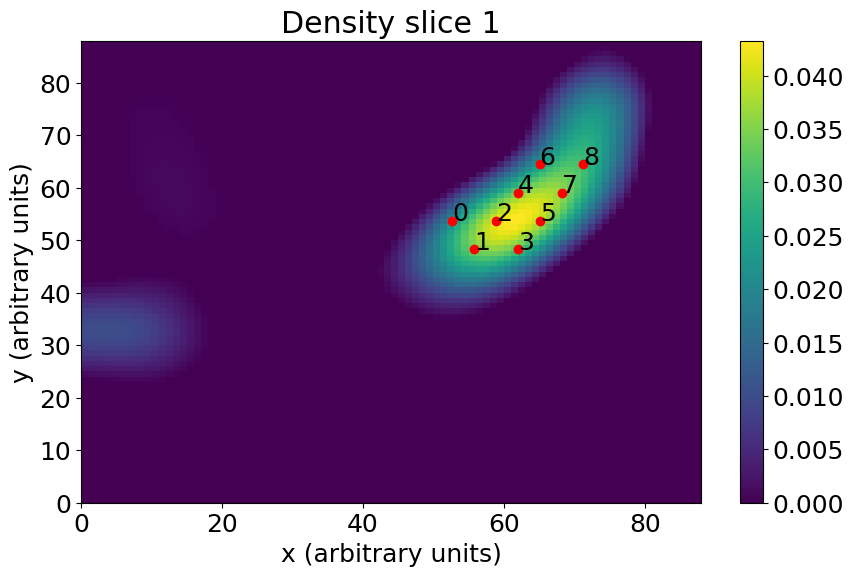

Processing density 3 of 6
Density 3 has 14 qubits


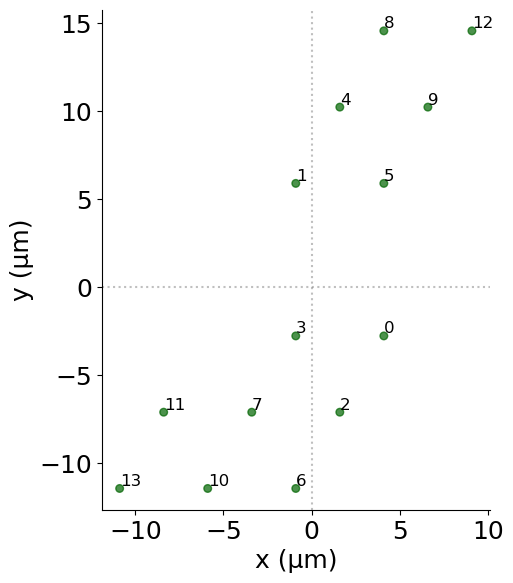

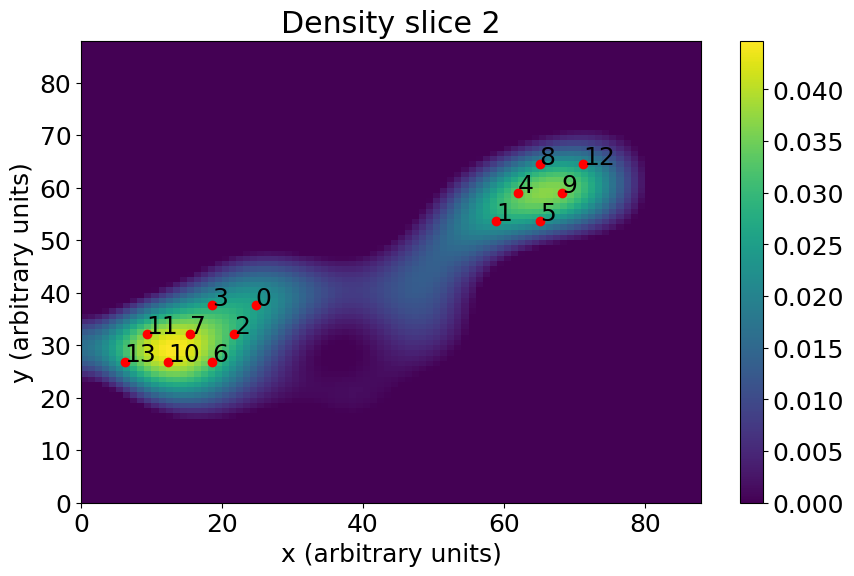

Processing density 4 of 6
Density 4 has 14 qubits


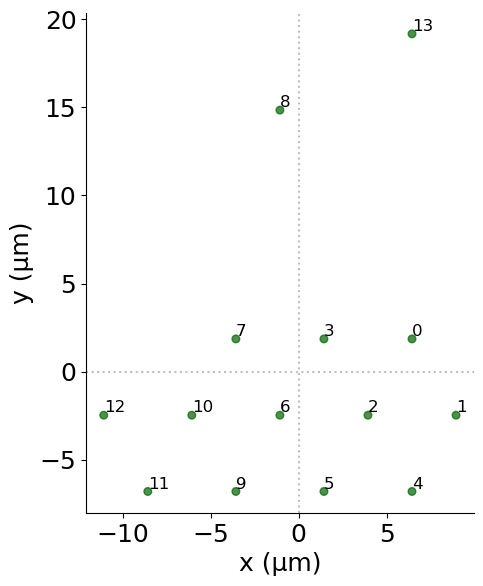

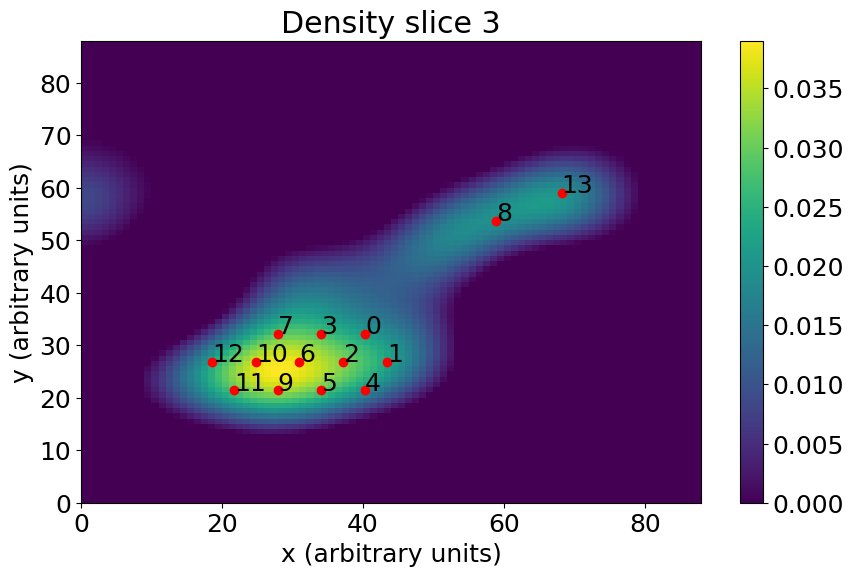

Processing density 5 of 6
Density 5 has 13 qubits


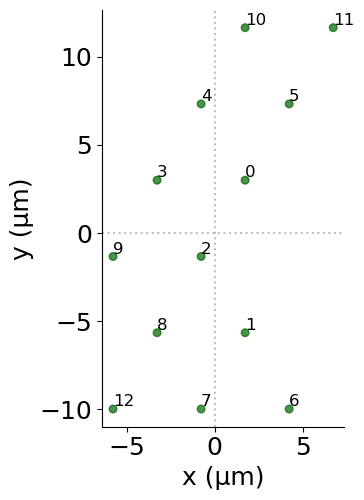

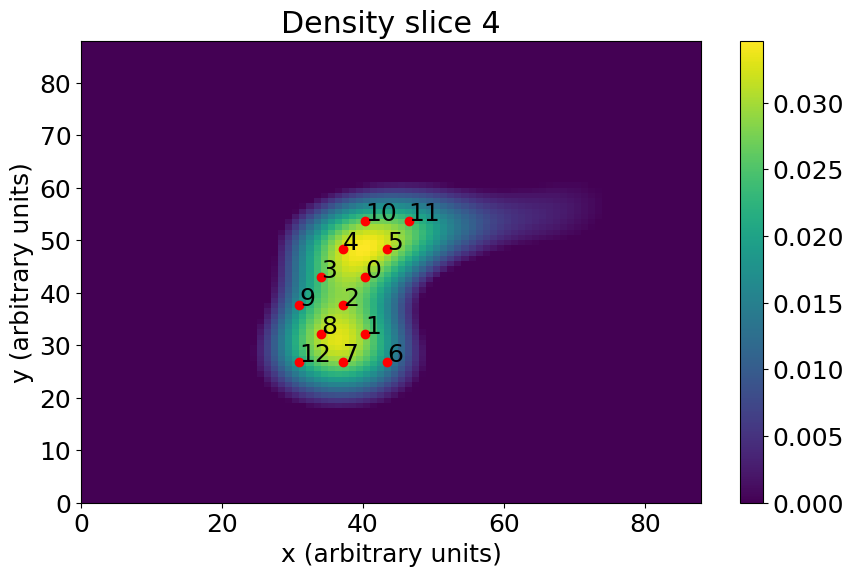

Processing density 6 of 6
Density 6 has 8 qubits


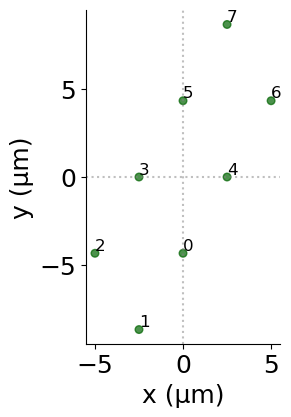

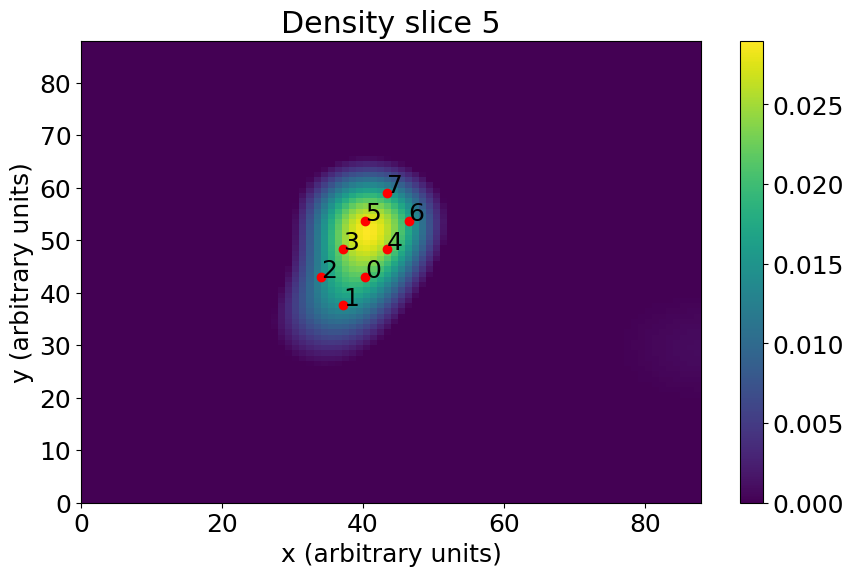

In [78]:
max_det = Fresnel.channel_objects[0].max_abs_detuning-1
T = 3000
solutions = []

for k, density in enumerate(densities):
    print(f"Processing density {k+1} of {len(densities)}")
    reg = registers[k]
    pos = positions[k]
    rescaled_pos = rescaled_positions[k]
    n = len(pos)
    print(f"Density {k+1} has {n} qubits")
    bitstrings = bmu.generate_binary_strings(n)
    reg.draw()
    fig, ax = dsu.plot_density(density, rescaled_pos, title=f"Density slice {k}", name=f"figures/density_qubits_reg{k}")

    plt.show()

Processing density 1 of 6
Density 1 has 4 qubits


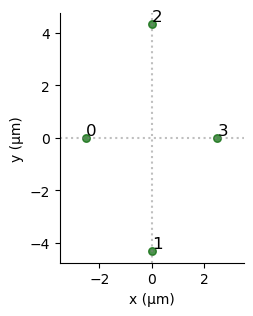

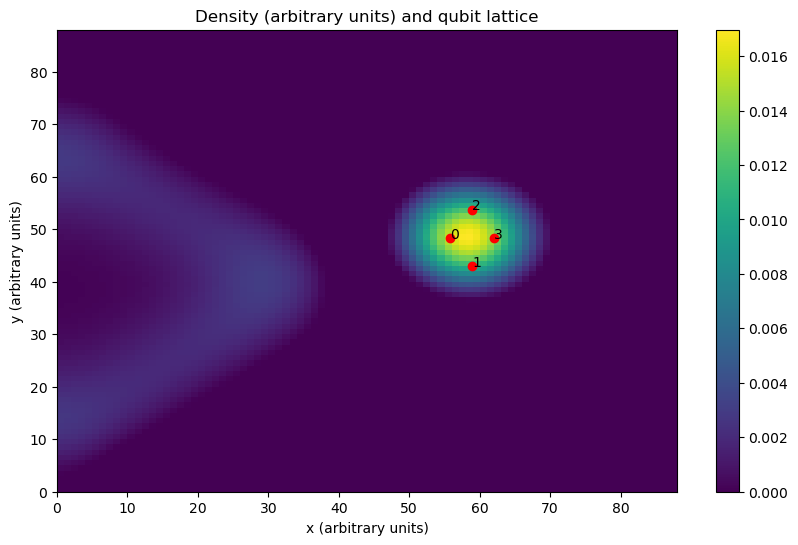

[ 30.41592654 -21.09306806 -25.61614391   4.61598244]
1000 809 -0.010743767178636635
0001 186 -0.009692037638099362
0000 5 0
1000


Processing density 2 of 6
Density 2 has 9 qubits


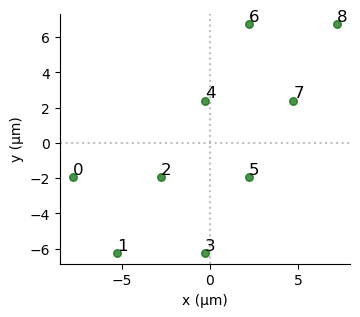

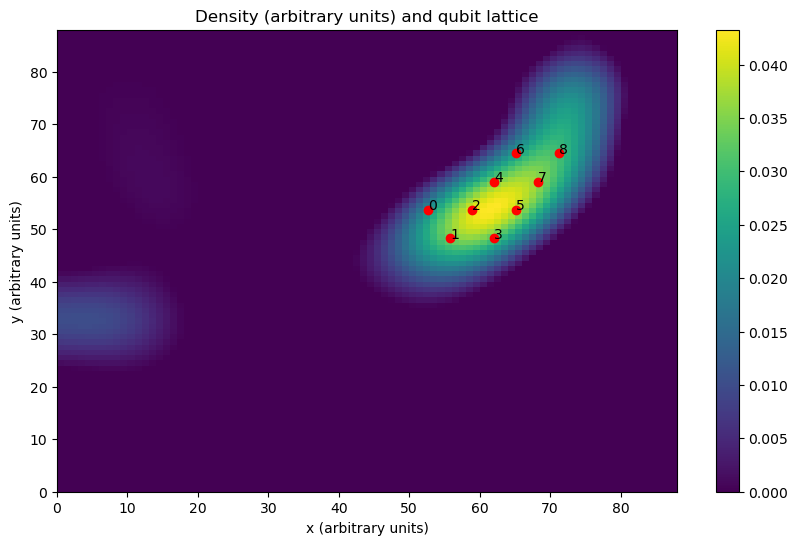

[-30.41592654  -1.31861645  21.88543243 -10.42807974   4.15448367
   7.74272801 -12.55169825   7.70273045 -13.62364929]
001000000 797 -0.04167669042965067
000001000 76 -0.0408843632707674
000000010 71 -0.03797858020238196
010000010 30 -0.043367911259863785
000010000 22 -0.03937355698387364
000000000 1 0
001000001 1 -0.04278486696692038
001000010 1 -0.01527712991696159
100000010 1 -0.03694633208790532
010000010


Processing density 3 of 6
Density 3 has 14 qubits


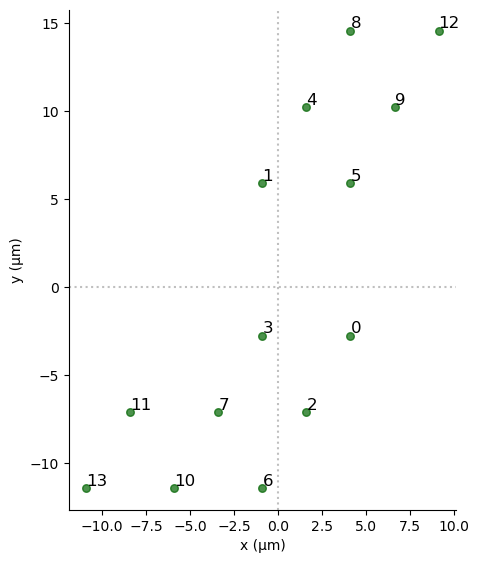

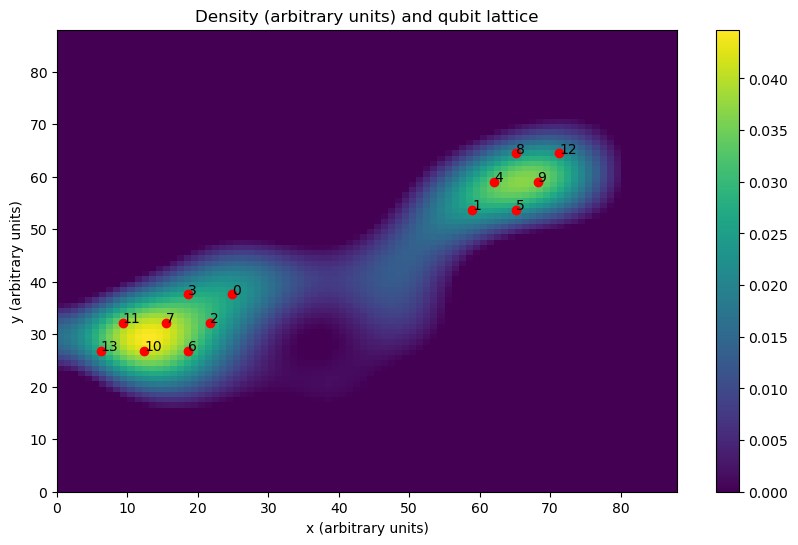

[-30.41592654   1.56152716   4.33427579 -12.67054802  14.33026974
   4.78053592  11.215767    25.69633972  -9.61943124  11.34997309
  19.99126429   1.55728992 -22.40287467 -19.70846216]
00001000001000 282 -0.0728561822274611
00001001000000 244 -0.07443814922545679
00000000011000 184 -0.07202974375239143
00000001010000 161 -0.0736117679582156
00001010000000 49 -0.07042267309528194
00000010010000 29 -0.06959628082740014
00000100001000 13 -0.07020802500495818
00000101000000 13 -0.07179000300359446
00101000001000 7 -0.0462991748637848
00000110000000 4 -0.0677745048721384
00100000011000 4 -0.0454736011204258
00000000001000 3 -0.04216377018128707
00000001000000 3 -0.04374579717578193
01000000001000 2 -0.06931532847248932
01000001000000 2 -0.07089649073527352
00001001000000


Processing density 4 of 6
Density 4 has 14 qubits


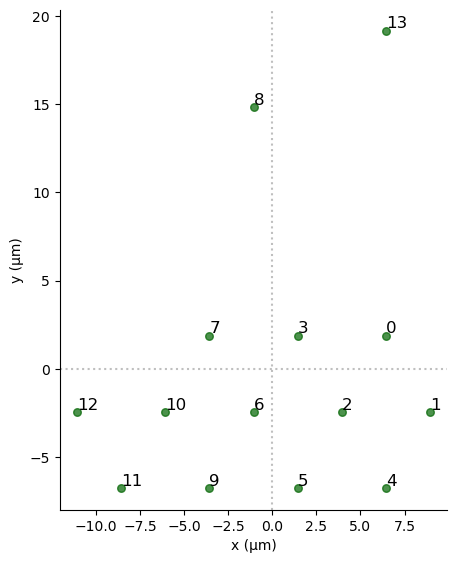

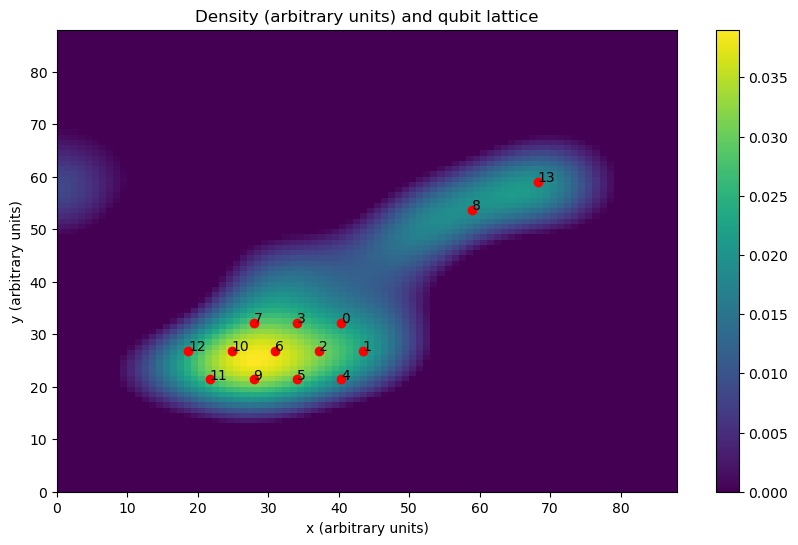

[-10.67936914 -21.87123665  20.24000823   2.36231265 -27.65390447
  -3.84520278  27.09176767 -15.41027172   0.           2.6558607
  17.97451896 -12.83187259 -30.41592654   0.        ]
00100000001000 265 -0.028923031519120443
00100000001001 164 -0.04354774966609995
00000010000000 152 -0.046372357884776
00100000101000 112 -0.04700500606995954
00000010000001 105 -0.06100172796093583
00000010100000 87 -0.064696167843508
00000000001000 34 -0.04177200800973407
00000000001001 18 -0.05640195776140376
00000000101000 15 -0.060150151298138575
00100000000000 12 -0.04027211994047757
00100000100000 9 -0.058363406670503826
00000000110000 4 -0.05880593928399708
00000000010000 3 -0.0404237154210956
00100000010001 3 -0.030942435539472735
00010000000000 2 -0.040149787858615546
00010000000001 2 -0.05477047732503433
00010000001000 2 -0.017543655153278638
00010000010001 2 -0.04207306716709351
00100000010000 2 -0.0163176946465022
00000000010001 1 -0.055053687918756325
00000000101001 1 -0.010401960334737297


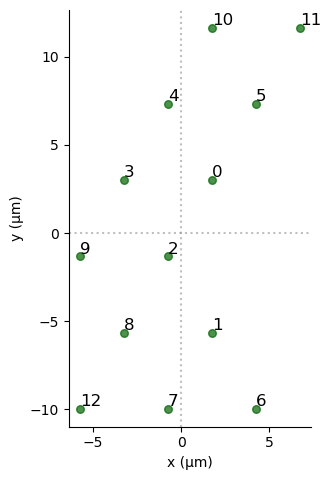

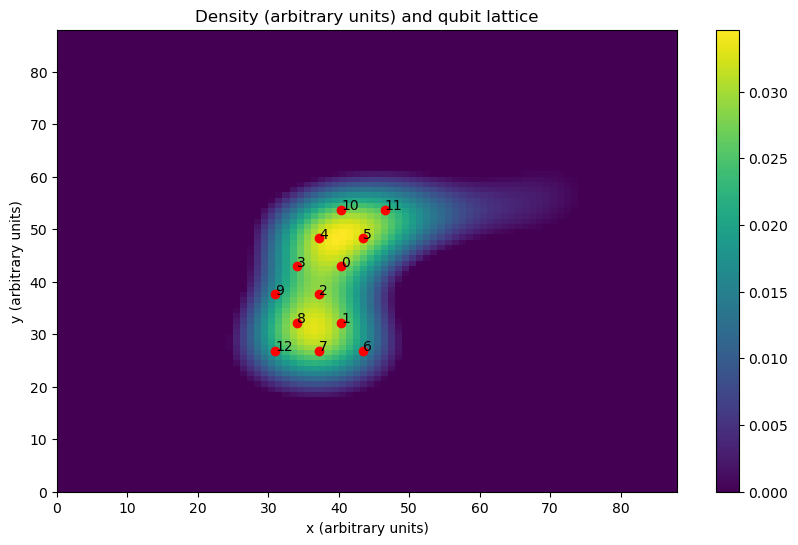

[  9.76564367   7.8789994   16.52411211  -2.47008013   4.44295696
  10.98632583 -30.41592654   3.07092702  13.74922606 -20.80077103
 -12.15316076 -19.51227992 -22.80451543]
0000010010000 479 -0.046538454808655594
0010010000000 297 -0.0176723355799941
0100010000000 74 -0.03540193900301909
1000000010000 59 -0.017475061544701506
0000100010000 36 -0.03754208293525721
0010000000000 18 -0.037244293296943176
1000000100000 10 -0.035270445467001255
0000010100000 8 -0.05195638820036796
0100100000000 7 -0.035929918173976366
0000000010000 5 -0.03330867648963974
1000000000000 5 -0.03728748148615307
0000010000001 1 -0.05138271960414098
0010100000000 1 -0.006943270466971581
0000010100000


Processing density 6 of 6
Density 6 has 8 qubits


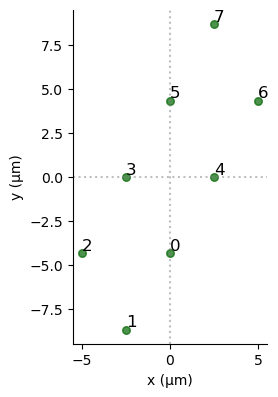

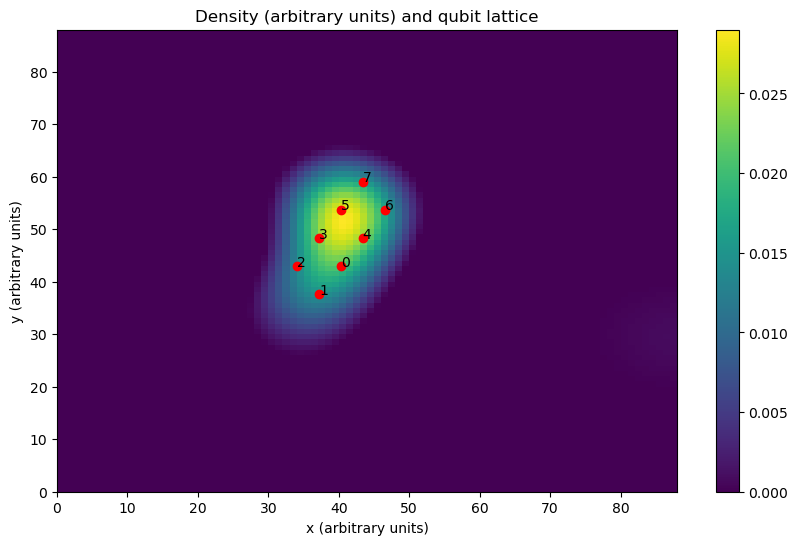

[  9.4467913  -26.8342536  -12.86862508  18.17359229   9.55340744
  23.04091593 -19.46212351 -30.41592654]
00000100 768 -0.023073821946831514
00010000 166 -0.02404680978135616
10000100 28 0.019970738890725415
00001000 25 -0.022806187285666586
10000000 11 -0.021333579877514046
10000001 2 -0.0060025659055378735
00010000




In [127]:
max_det = Fresnel.channel_objects[0].max_abs_detuning-1
T = 3000
solutions = []

for k, density in enumerate(densities):
    print(f"Processing density {k+1} of {len(densities)}")
    reg = registers[k]
    pos = positions[k]
    rescaled_pos = rescaled_positions[k]
    n = len(pos)
    print(f"Density {k+1} has {n} qubits")
    bitstrings = bmu.generate_binary_strings(n)
    reg.draw()
    dsu.plot_density(density, rescaled_pos)
    
    distances_density = dsu.find_possible_distances(rescaled_pos)
    distances_register = dsu.find_possible_distances(pos)
    scale = distances_density[0]/distances_register[0]
    gamma_list = dsu.gamma_list(density, rescaled_pos, variance)
    dets = gamma_list# - np.mean(gamma_list)
    for i in range(n):
        dets[i] -= np.mean(dsu.neighbouring_gamma_list(density, rescaled_pos, rescaled_pos[i], scale*brad, variance))
    dets *= max_det/np.max(np.abs(dets))
    print(dets)
    
    seq = Sequence(reg, MockDevice)
    for i in range(n):
        seq.declare_channel(f'ch{i}', 'rydberg_local')
        seq.target(i, f'ch{i}')
        pulse = Pulse(InterpolatedWaveform(T, [0, omega, 0]), InterpolatedWaveform(T, [-max_det, 0, dets[i]]), 0)
        seq.add(pulse, f'ch{i}')
    sim = Simulation(seq)
    res = sim.run()
    samples = res.sample_final_state(1000)
    quantum_solutions = sorted(samples.items(), key=lambda x: x[1], reverse=True)
    quantum_classical_solutions = []
    for bitstring, count in quantum_solutions:
        ising = dsu.ising_energies(rescaled_pos, density, variance, [bitstring], brad, amp=amplitude)
        try:
            i_bit = ising[0][0]
            i_en = ising[0][1]
            quantum_classical_solutions.append((bitstring, count, i_en)) 
        except IndexError:
            i_bit = bitstring
            i_en = 1e10
            quantum_classical_solutions.append((bitstring, count, i_en)) 
        assert bitstring == i_bit
        print(bitstring, count, i_en)
    best_solution = sorted(quantum_classical_solutions, key=lambda x: x[2], reverse=False)[0][0]
    solutions.append(best_solution)
    print(best_solution)

    
    print()
    print()

In [129]:
with open('best_bitstrings/best_bitstrings.npy', 'wb') as file_out:
    np.save(file_out, solutions)

In [5]:
with open('best_bitstrings/best_bitstrings.npy', 'rb') as file_in:
    solutions = np.load(file_in)

In [69]:
import matplotlib as mpl

mpl.rc('font', size=18)

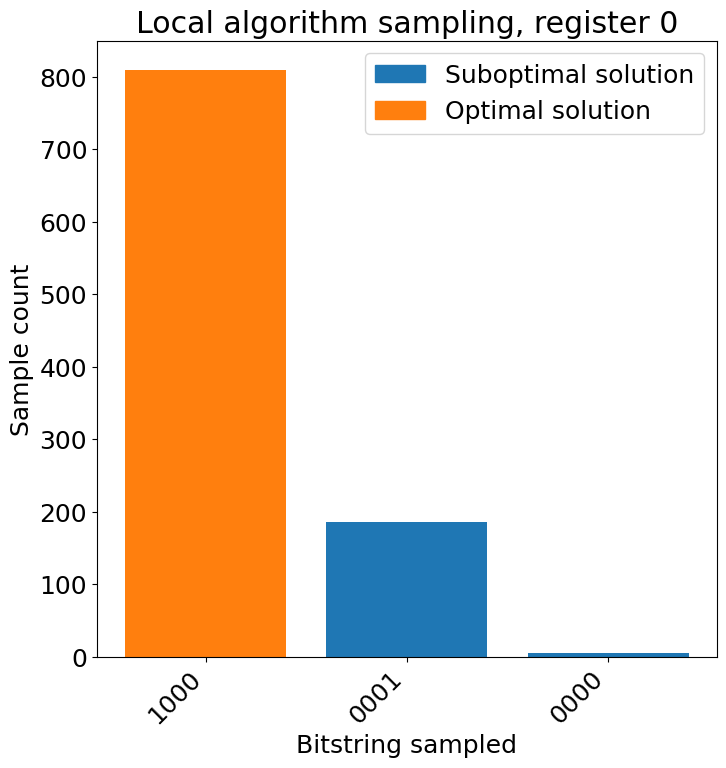

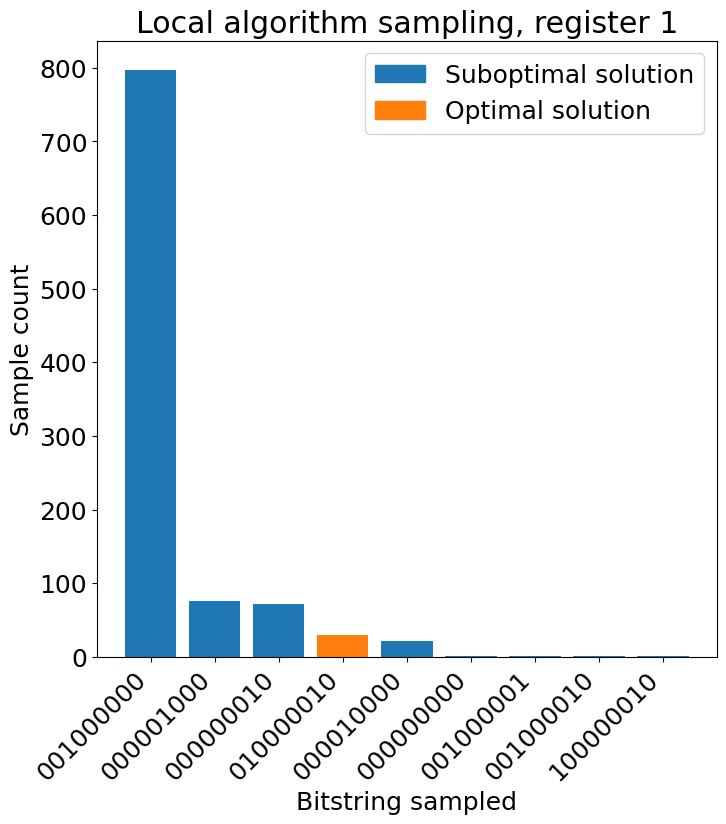

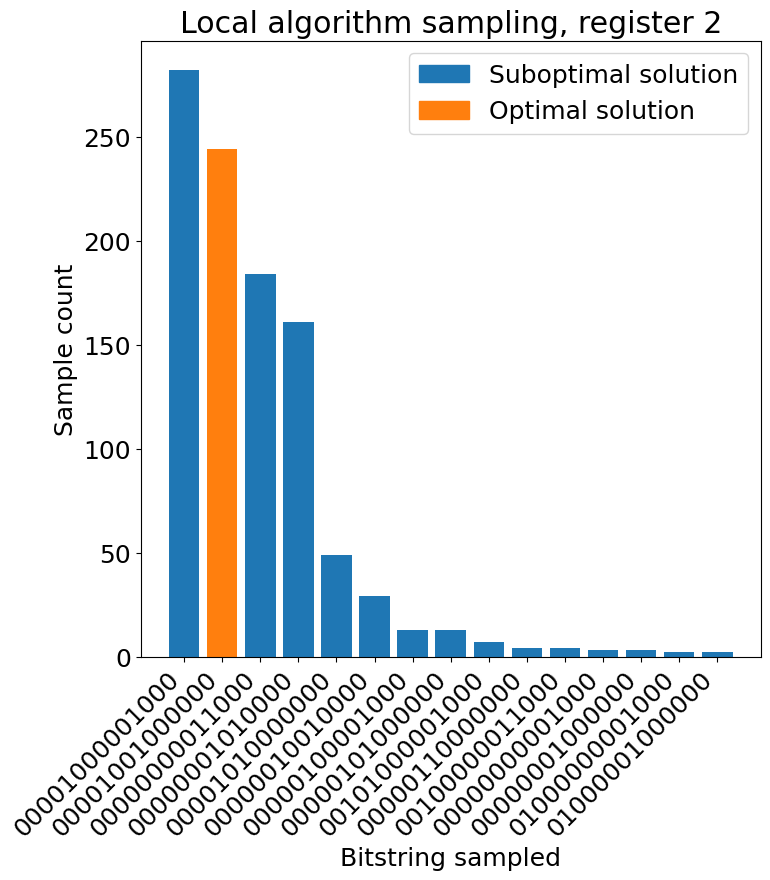

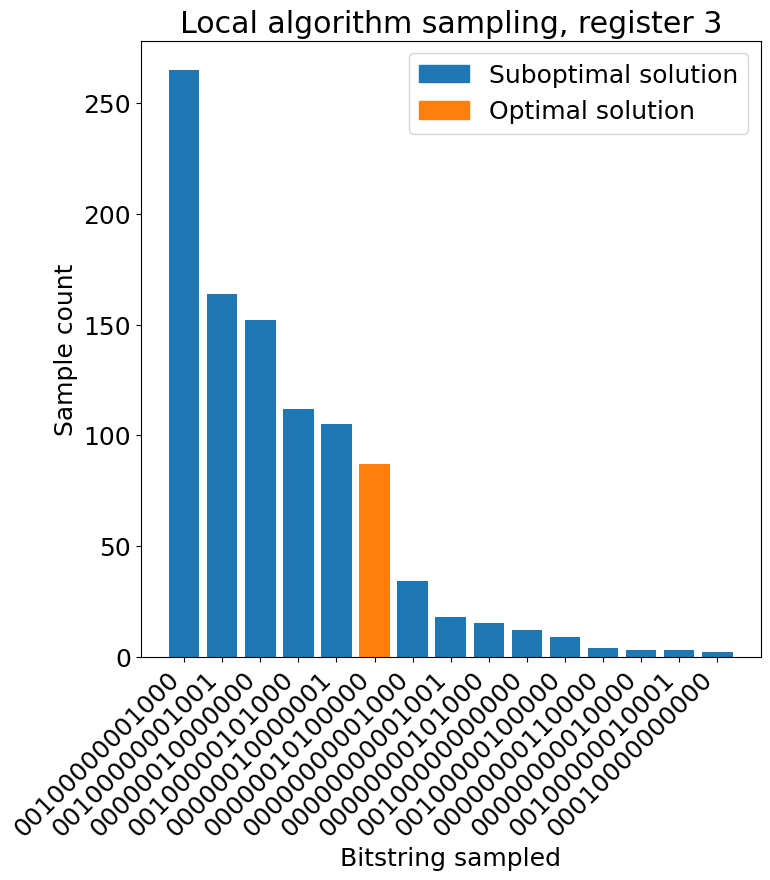

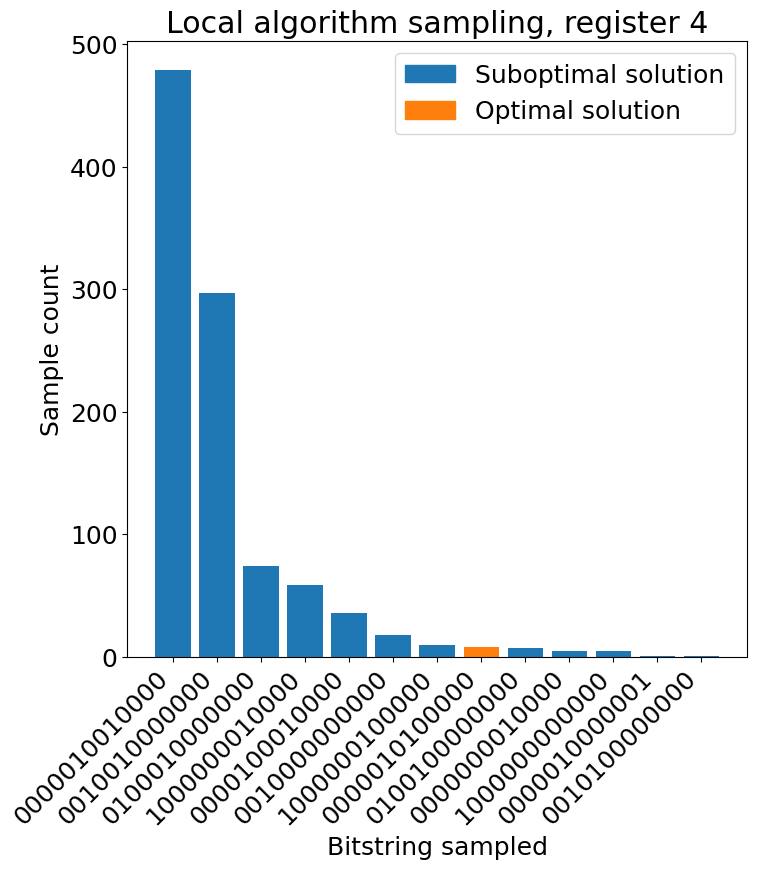

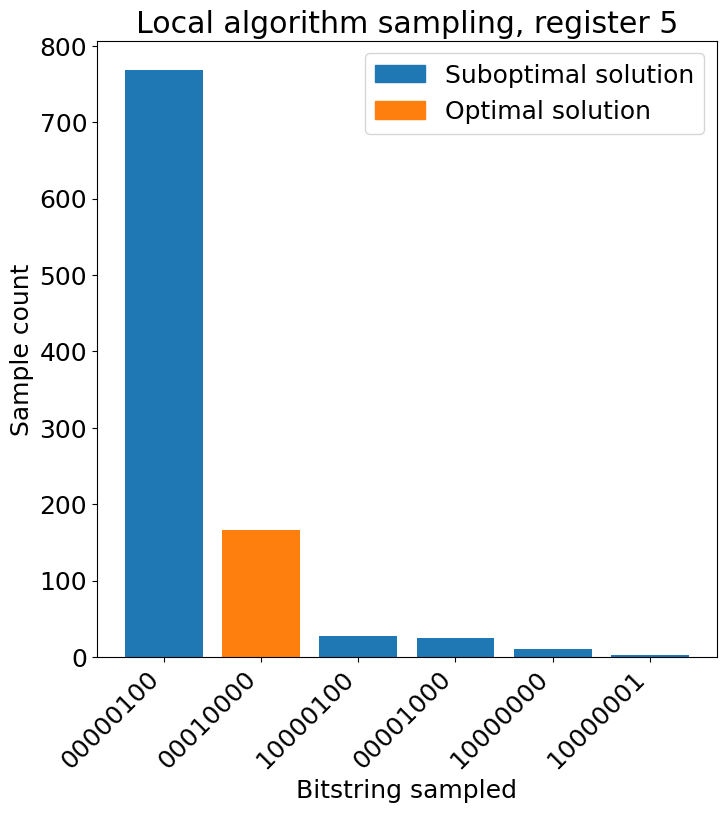

In [70]:
regs = [
    np.array([
        ("1000", 809, -0.010743767178636635),
        ("0001", 186, -0.009692037638099362),
        ("0000", 5, 0)
    ], dtype=object),
    np.array([
        ("001000000", 797, -0.04167669042965067),
        ("000001000", 76, -0.0408843632707674),
        ("000000010", 71, -0.03797858020238196),
        ("010000010", 30, -0.043367911259863785),
        ("000010000", 22, -0.03937355698387364),
        ("000000000", 1, 0),
        ("001000001", 1, -0.04278486696692038),
        ("001000010", 1, -0.01527712991696159),
        ("100000010", 1, -0.03694633208790532),
    ], dtype=object),
    np.array([
        ("00001000001000", 282, -0.0728561822274611),
        ("00001001000000", 244, -0.07443814922545679),
        ("00000000011000", 184, -0.07202974375239143),
        ("00000001010000", 161, -0.0736117679582156),
        ("00001010000000", 49, -0.07042267309528194),
        ("00000010010000", 29, -0.06959628082740014),
        ("00000100001000", 13, -0.07020802500495818),
        ("00000101000000", 13, -0.07179000300359446),
        ("00101000001000", 7, -0.0462991748637848),
        ("00000110000000", 4, -0.0677745048721384),
        ("00100000011000", 4, -0.0454736011204258),
        ("00000000001000", 3, -0.04216377018128707),
        ("00000001000000", 3, -0.04374579717578193),
        ("01000000001000", 2, -0.06931532847248932),
        ("01000001000000", 2, -0.07089649073527352),
    ], dtype=object),
    np.array([
        ("00100000001000", 265, -0.028923031519120443),
        ("00100000001001", 164, -0.04354774966609995),
        ("00000010000000", 152, -0.046372357884776),
        ("00100000101000", 112, -0.04700500606995954),
        ("00000010000001", 105, -0.06100172796093583),
        ("00000010100000", 87, -0.064696167843508),
        ("00000000001000", 34, -0.04177200800973407),
        ("00000000001001", 18, -0.05640195776140376),
        ("00000000101000", 15, -0.060150151298138575),
        ("00100000000000", 12, -0.04027211994047757),
        ("00100000100000", 9, -0.058363406670503826),
        ("00000000110000", 4, -0.05880593928399708),
        ("00000000010000", 3, -0.0404237154210956),
        ("00100000010001", 3, -0.030942435539472735),
        ("00010000000000", 2, -0.040149787858615546),
        ("00010000000001", 2, -0.05477047732503433),
        ("00010000001000", 2, -0.017543655153278638),
        ("00010000010001", 2, -0.04207306716709351),
        ("00100000010000", 2, -0.0163176946465022),
        ("00000000010001", 1, -0.055053687918756325),
        ("00000000101001", 1, -0.010401960334737297),
        ("00000010000011", 1, -0.03584068675650901),
        ("00000010000101", 1, -0.029778382320848),
        ("00010000101000", 1, -0.03539462511050716),
        ("00100000000001", 1, -0.05489688998139333),
        ("00100000000010", 1, -0.047912817670093255),
    ], dtype=object),
    np.array([
        ("0000010010000", 479, -0.046538454808655594),
        ("0010010000000", 297, -0.0176723355799941),
        ("0100010000000", 74, -0.03540193900301909),
        ("1000000010000", 59, -0.017475061544701506),
        ("0000100010000", 36, -0.03754208293525721),
        ("0010000000000", 18, -0.037244293296943176),
        ("1000000100000", 10, -0.035270445467001255),
        ("0000010100000", 8, -0.05195638820036796),
        ("0100100000000", 7, -0.035929918173976366),
        ("0000000010000", 5, -0.03330867648963974),
        ("1000000000000", 5, -0.03728748148615307),
        ("0000010000001", 1, -0.05138271960414098),
        ("0010100000000", 1, -0.006943270466971581),
    ], dtype=object),
    np.array([
        ("00000100", 768, -0.023073821946831514),
        ("00010000", 166, -0.02404680978135616),
        ("10000100", 28, 0.019970738890725415),
        ("00001000", 25, -0.022806187285666586),
        ("10000000", 11, -0.021333579877514046),
        ("10000001", 2, -0.0060025659055378735),
    ], dtype=object),
]


for i in range(len(regs)):
    plt.figure(figsize=(8,8))
    plt.xlabel("Bitstring sampled")
    plt.ylabel("Sample count")
    plt.title(f"Local algorithm sampling, register {i}")
    plt.xticks(rotation=45, ha='right')
    colors = ['tab:blue' if item != solutions[i] else 'tab:orange' for item in regs[i][:,0]]
    plt.bar(regs[i][:15,0], regs[i][:15,1], color=colors)
    colors = {'Suboptimal solution':'tab:blue', 'Optimal solution':'tab:orange'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
    plt.savefig(f"figures/local_algo_{i}", bbox_inches='tight')
    plt.show()
    

[('000001', 3), ('001001', 1), ('001010', 2), ('001100', 2), ('010001', 26), ('010010', 11), ('010100', 6), ('011010', 1), ('100000', 2), ('100001', 7), ('100010', 22), ('100100', 17), ('101001', 88), ('101010', 11), ('101100', 1)]


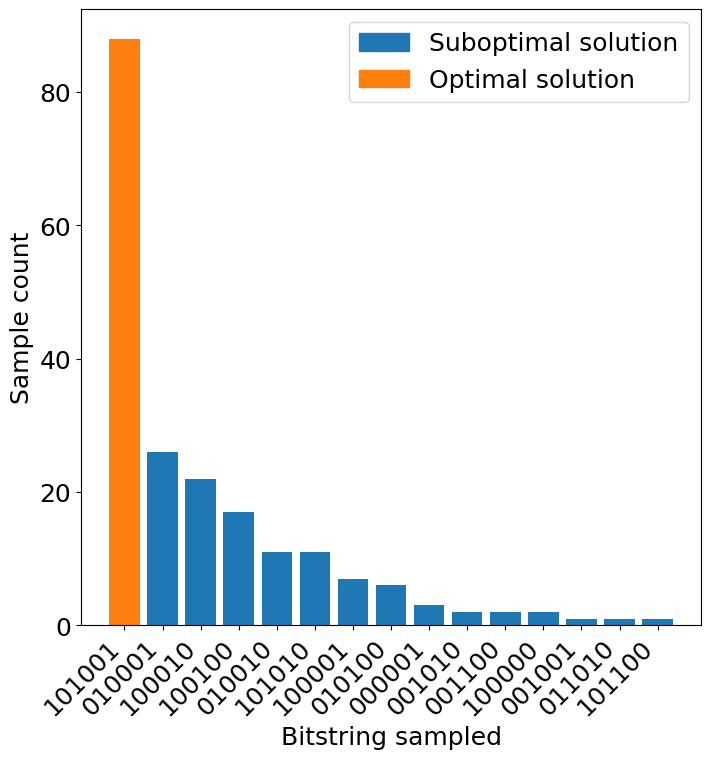

In [73]:
# VQA data
VQA_results = []
with open("VQA/final_sampling.txt", 'r') as f:
    for line in f:
        bitstring, count = line.split(" : ")
        VQA_results.append((bitstring, int(count)))
print(VQA_results)
VQA_results = np.array(sorted(VQA_results, key=lambda x: x[1], reverse=True), dtype=object)
VQA_results

solution = "101001"
    
plt.figure(figsize=(8,8))
plt.xlabel("Bitstring sampled")
plt.ylabel("Sample count")
#plt.title(f"VQA algorithm sampling")
plt.xticks(rotation=45, ha='right')
colors = ['tab:blue' if item != solution else 'tab:orange' for item in VQA_results[:,0]]
plt.bar(VQA_results[:,0], VQA_results[:,1], color=colors)
colors = {'Suboptimal solution':'tab:blue', 'Optimal solution':'tab:orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig(f"figures/VQA_results.png", bbox_inches='tight')
plt.show()

## Find water molecule positions in the protein cavity

In [19]:
qubit_indices = []
for bitstring in solutions:
    ls = []
    for i,b in enumerate(bitstring):
        if b=='1':
            ls.append(i)
    qubit_indices.append(ls)

In [21]:
qubit_positions = []
for i,slice in enumerate(qubit_indices):
    ls = []
    for idx in slice:
        ls.append(registers[i]._coords[idx])
    qubit_positions.append(ls)

In [23]:
qubit_rescaled_positions = []
for i,slice in enumerate(qubit_indices):
    ls = []
    for idx in slice:
        ls.append(rescaled_positions[i][idx])
    qubit_rescaled_positions.append(ls)

In [27]:
water_indices = []
for i,slice in enumerate(qubit_rescaled_positions):
    ls = []
    for pos in slice:
        ls.append((int(pos[1]), int(pos[0])))
    water_indices.append(ls)

In [42]:
water_positions = []
water_weights = []
for i,slice in enumerate(water_indices):
    ls = []
    ws = []
    for idx_i, idx_j in slice:
        ls.append(points[i][idx_i,idx_j])
        ws.append(densities[i][idx_i, idx_j])
    water_positions.append(ls)
    water_weights.append(ws)

In [43]:
water_positions_flat = []
for water in water_positions:
    water_positions_flat += water
print(water_positions_flat)
water_weights_flat = []
for weight in water_weights:
    water_weights_flat += weight
print(water_weights_flat)

[array([24.331302  , 16.37638359, 32.70407856]), array([24.331302  , 15.95704731, 32.97639654]), array([24.07561299, 16.51974763, 33.842886  ]), array([24.37951925, 15.98075744, 33.93095164]), array([25.77148983, 14.29863619, 31.34069132]), array([24.74137793, 14.03285874, 31.84947105]), array([24.36242821, 15.3161336 , 33.82555688]), array([24.93911452, 14.45973064, 33.4248458 ]), array([24.43747167, 13.73317637, 32.30604137]), array([25.24302078, 13.92074045, 33.51291144])]
[0.015249835692948433, 0.03356894669406045, 0.03550366107594792, 0.03352630018368241, 0.04006810637433739, 0.03742924112712025, 0.01930749698018831, 0.03162816030517367, 0.027501466461022958, 0.024202646556022025]


In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(water_positions_flat)

with open("best_bitstrings/localalgo_water_molecules.xyz", 'w') as f:
    f.write(str(len(kmeans.cluster_centers_)) + "\n\n")
    for center in kmeans.cluster_centers_:
        f.write("O " + str(center[0]) + " " + str(center[1]) + " " + str(center[2]) + "\n")

/Users/maurodarcangelo/miniconda3/envs/benchmark/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
kmeans = KMeans(n_clusters=2).fit(water_positions_flat, sample_weight=water_weights_flat)

with open("best_bitstrings/localalgoweighted_water_molecules.xyz", 'w') as f:
    f.write(str(len(kmeans.cluster_centers_)) + "\n\n")
    for center in kmeans.cluster_centers_:
        f.write("O " + str(center[0]) + " " + str(center[1]) + " " + str(center[2]) + "\n")

/Users/maurodarcangelo/miniconda3/envs/benchmark/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
